## Observations and Insights 

After going through and cleaning the data, some analysis was able to be made on the data set. From the box plot, Capomulin and Ramicane show they have a better performace than Infubinol and Ceftamin in terms of final tumor volume. The lower bound of Infubinol and Ceftamin final tumor volume is close to the upper bound of Capomulin and Ramicane. There is an outlier for Infubinol, but it doesn't have a skewness toward the bottom. That outlier can be regarded as an exception. In the line graph where it evaluates a random mice and see the effect of the drug has on mice, the tumor volume slowly decreased over a period of time. This shows that drugs does help to reduce tumor volume. Lastly with the scatter graph and the pearson coorelation value, it shows there is a strong positive coorelation between weight and tumor volume. This is an important element to put into consideration because that means it is not accurate to only look at tumor volume without considering the weight of these mice. 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
full_study_df = pd.merge(mouse_metadata, study_results, how='left', on='Mouse ID')

# Display the data table for preview
full_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
len(full_study_df['Mouse ID'].value_counts().index)

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
full_study_df[['Mouse ID', 'Timepoint']].value_counts()
full_study_df.loc[full_study_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False), :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dup_drop_df = full_study_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
dup_drop_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
len(dup_drop_df['Mouse ID'].value_counts().index)

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
dup_drop_df.describe()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
by_regimen_df = dup_drop_df.groupby(['Drug Regimen'])

regimen_sum = {
    'Tumor Volume Mean' : by_regimen_df['Tumor Volume (mm3)'].mean(),
    'Tumor Volume Median' : by_regimen_df['Tumor Volume (mm3)'].median(),
    'Tumor Volume Variance' : by_regimen_df['Tumor Volume (mm3)'].var(),
    'Tumor Volume Standard Deviation' : by_regimen_df['Tumor Volume (mm3)'].std(),
    'Tumor Volume SEM' : by_regimen_df['Tumor Volume (mm3)'].sem(),
}

regimen_stats_df = pd.DataFrame(regimen_sum)
regimen_stats_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
by_regimen_df['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

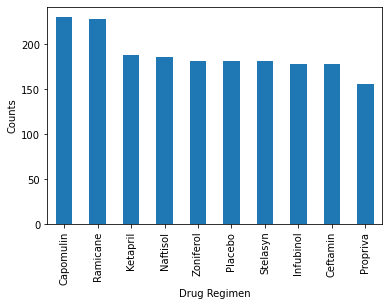

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
dup_drop_df['Drug Regimen'].value_counts().plot.bar()
plt.xlabel('Drug Regimen')
plt.ylabel('Counts')
plt.show()

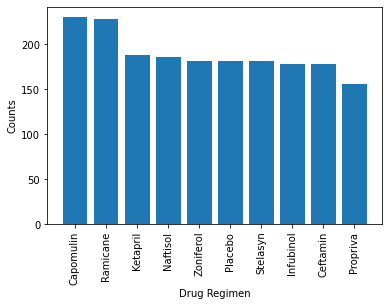

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(dup_drop_df['Drug Regimen'].value_counts().index, dup_drop_df['Drug Regimen'].value_counts())
plt.xlabel('Drug Regimen')
plt.ylabel('Counts')
plt.xticks(rotation='vertical')
plt.show()

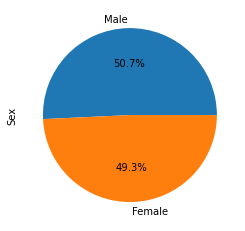

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
dup_drop_df['Sex'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

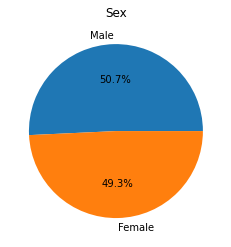

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(dup_drop_df['Sex'].value_counts(), labels=dup_drop_df['Sex'].value_counts().index, autopct='%1.1f%%')
plt.title('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
samp_treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
samp_treatment_df = dup_drop_df[(dup_drop_df['Drug Regimen'].isin(samp_treatment))]

# Start by getting the last (greatest) timepoint for each mouse
samp_max_df = samp_treatment_df.groupby(['Mouse ID'])['Timepoint'].max()
samp_max_df = samp_max_df.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
samp_merge_df = samp_max_df.merge(dup_drop_df, how='left', on=['Mouse ID', 'Timepoint'])
samp_merge_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
samp_treatment

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in samp_treatment:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    max_tumor = samp_merge_df[samp_merge_df['Drug Regimen'] == i]['Tumor Volume (mm3)']
    #max_tumor = samp_merge_df.loc[samp_merge_df['Drug Regimen'] == i, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol.append(max_tumor)
    print(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = max_tumor.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (iqr * 1.5)
    uppper_bound = upperq  + (iqr * 1.5)
    outliers = max_tumor.loc[(max_tumor < lower_bound) | (max_tumor > uppper_bound)]
    print(f'The outlier of {i} is {outliers}.')


[9     38.982878
12    38.939633
24    30.485985
25    37.074024
26    40.159220
32    47.685963
33    37.311846
34    38.125164
35    38.753265
45    41.483008
49    38.846876
51    28.430964
53    33.329098
64    46.539206
65    32.377357
68    41.581521
70    23.343598
72    40.728578
73    34.455298
78    31.023923
82    40.658124
83    39.952347
88    36.041047
90    28.484033
96    31.896238
Name: Tumor Volume (mm3), dtype: float64]
The outlier of Capomulin is Series([], Name: Tumor Volume (mm3), dtype: float64).
[9     38.982878
12    38.939633
24    30.485985
25    37.074024
26    40.159220
32    47.685963
33    37.311846
34    38.125164
35    38.753265
45    41.483008
49    38.846876
51    28.430964
53    33.329098
64    46.539206
65    32.377357
68    41.581521
70    23.343598
72    40.728578
73    34.455298
78    31.023923
82    40.658124
83    39.952347
88    36.041047
90    28.484033
96    31.896238
Name: Tumor Volume (mm3), dtype: float64, 3     38.407618
4     43.047543


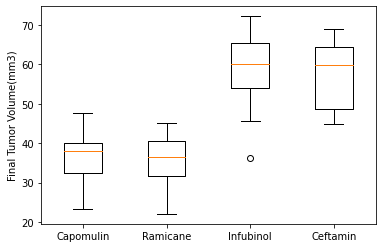

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol, labels=samp_treatment)
plt.ylabel('Final Tumor Volume(mm3)')
plt.show()

## Line and Scatter Plots

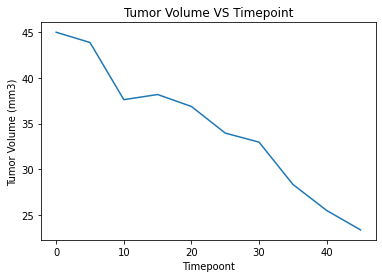

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mouse_df = dup_drop_df[dup_drop_df['Mouse ID'].isin(['s185'])]
plt.plot(cap_mouse_df['Timepoint'], cap_mouse_df['Tumor Volume (mm3)'])
plt.xlabel('Timepoont')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume VS Timepoint')
plt.show()

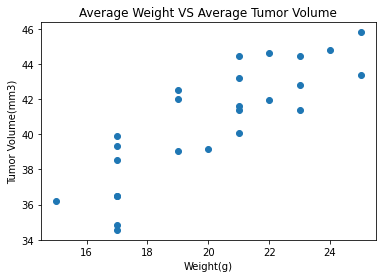

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_df = dup_drop_df[dup_drop_df['Drug Regimen'].isin(['Capomulin'])]
cap_avg_df = cap_df.groupby('Mouse ID').mean()
cap_avg_weight = cap_avg_df['Weight (g)']
cap_avg_tumor = cap_avg_df['Tumor Volume (mm3)']
plt.scatter(cap_avg_weight, cap_avg_tumor)
plt.xlabel('Weight(g)')
plt.ylabel('Tumor Volume(mm3)')
plt.title('Average Weight VS Average Tumor Volume')
plt.show()

## Correlation and Regression

                    Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  \
Age_months            1.000000   -0.074396  -0.352502            0.015190   
Weight (g)           -0.074396    1.000000  -0.256449            0.841936   
Timepoint            -0.352502   -0.256449   1.000000           -0.116552   
Tumor Volume (mm3)    0.015190    0.841936  -0.116552            1.000000   
Metastatic Sites     -0.074090   -0.218440   0.443939           -0.099062   

                    Metastatic Sites  
Age_months                 -0.074090  
Weight (g)                 -0.218440  
Timepoint                   0.443939  
Tumor Volume (mm3)         -0.099062  
Metastatic Sites            1.000000  
The r-squared is: 0.7088568047708723


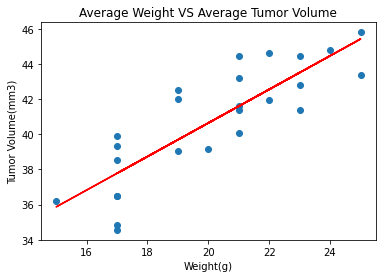

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(cap_avg_weight, cap_avg_tumor)
round(correlation[0], 2)
print(cap_avg_df.corr())
cap_slope, cap_int, cap_r, cap_p, cap_std_err = st.linregress(cap_avg_weight, cap_avg_tumor)
regress_value = cap_avg_weight * cap_slope + cap_int
print(f'The r-squared is: {cap_r**2}')


plt.scatter(cap_avg_weight, cap_avg_tumor)
plt.plot(cap_avg_weight, regress_value, color='red')
plt.xlabel('Weight(g)')
plt.ylabel('Tumor Volume(mm3)')
plt.title('Average Weight VS Average Tumor Volume')
plt.show()